<a href="https://colab.research.google.com/github/saurabh26-tech/Adhikaar-A7-/blob/master/120YearsOfOlympicHistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/mkaustubh/data-analytics.git

**This is an [Olympics Exploratory Data Analysis](https://github.com/mkaustubh/data-analytics) notebook. You can reference the dataset at [this link](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results).**
___


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [ ]:
athletes = pd.read_csv('data-analytics/archive/athlete_events.csv')
regions = pd.read_csv('data-analytics/archive/noc_regions.csv')

In [ ]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# Join the dataframes

In [ ]:
athletes_df = athletes.merge(regions, how='left', on='NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
athletes_df.shape

(271116, 17)

# Column names consistent

In [ ]:
athletes_df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [ ]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Check null values

In [ ]:
athletes_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

Columns name containing null values in form of a list

In [ ]:
athletes_df.columns[athletes_df.isna().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [ ]:
athletes_df.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [ ]:
athletes_df.query('Team == "Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


# Top countries participated

In [ ]:
top_10_countries = athletes_df['Team'].value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

# Plot for top 10 countries

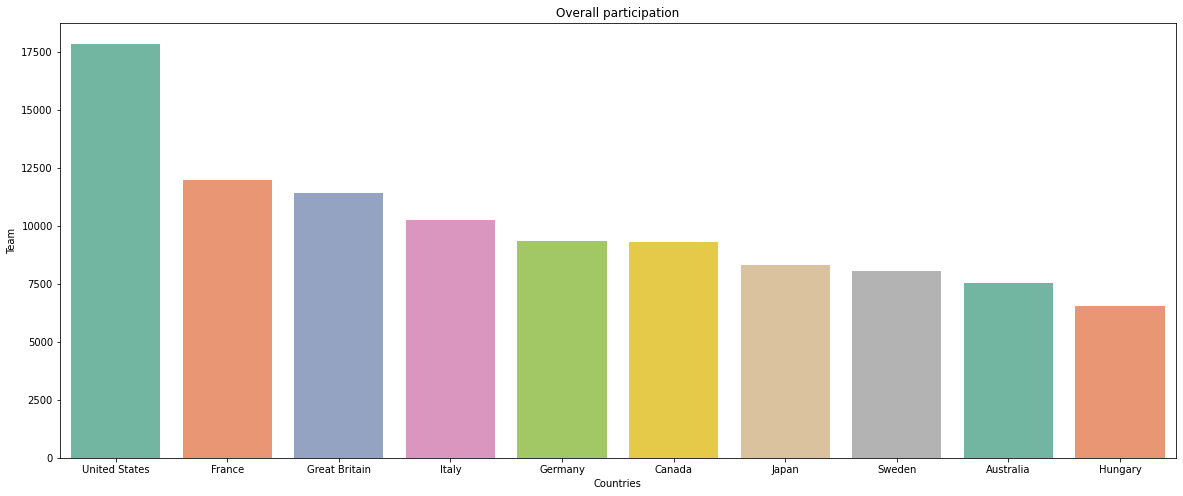

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Overall participation')
plt.xlabel('Countries')
sns.barplot(x = top_10_countries.index, y = top_10_countries, palette='Set2')

# Age distribution of the athletes

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

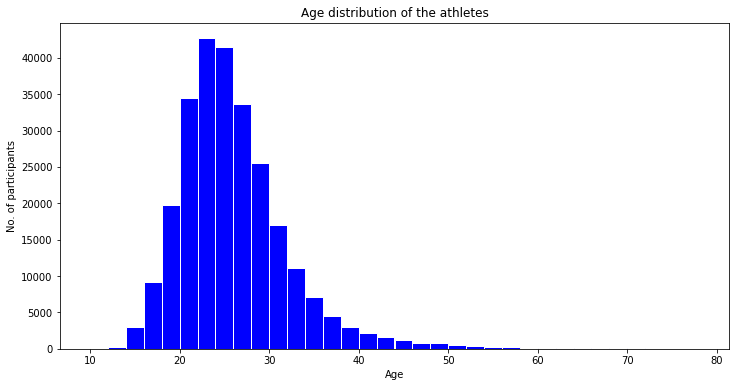

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('No. of participants')
plt.hist(athletes_df.Age, bins=np.arange(10,80,2), color='blue', edgecolor='white')

# Winter olympic sports

In [ ]:
winter_sports = athletes_df[athletes_df['Season']=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

# Summer olympic sports

In [ ]:
summer_sports = athletes_df[athletes_df['Season']=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

# Number of male and female participants

In [ ]:
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

# Pie plot for male and female participants

([<matplotlib.patches.Wedge at 0x7f8c2ec36ad0>,
 [Text(0.7147310163003329, -0.8361576252945934, 'M'),
  Text(-0.7147309380136028, 0.836157692212537, 'F')],
 [Text(0.38985328161836336, -0.4560859774334145, '72.5%'),
  Text(-0.3898532389165105, 0.456086013934111, '27.5%')])

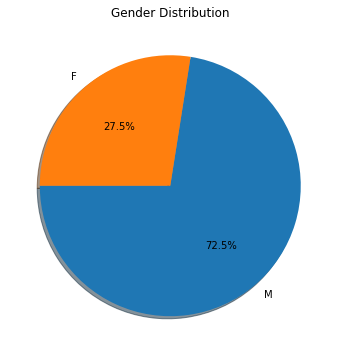

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, shadow=True)

# Total medals

In [ ]:
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

# Total number of female athletes in each olympics

In [ ]:
female_particiapnts = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex', 'Year']]
female_particiapnts = female_particiapnts.groupby('Year').count().reset_index()
female_particiapnts.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


Text(0.5, 1.0, 'Women Participation')

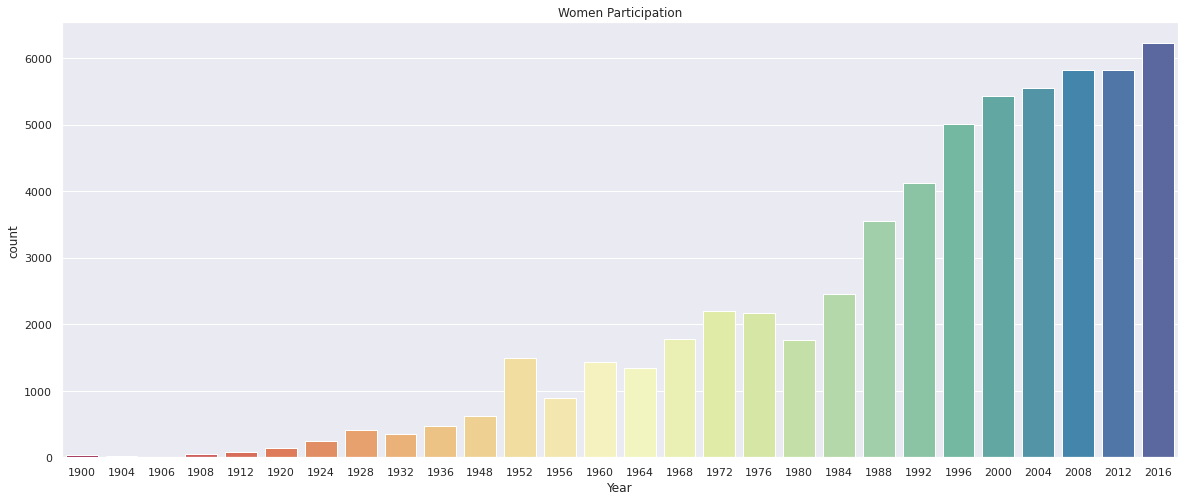

In [ ]:
womenOlympics = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(20,8))
sns.countplot(x='Year', data=womenOlympics, palette='Spectral')
plt.title('Women Participation')

# Gold medal above age 60

In [ ]:
goldMedals = athletes_df[(athletes_df.Medal=='Gold') & (athletes_df.Age>60)]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
104003,52626,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands,NaN
105199,53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
226374,113773,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,NaN,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN
233390,117046,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden,NaN


In [ ]:
goldMedals.count().ID

6

In [ ]:
sporting_event = goldMedals.Sport
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

# Plot for sporting event

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medal for athletes above 60 years')

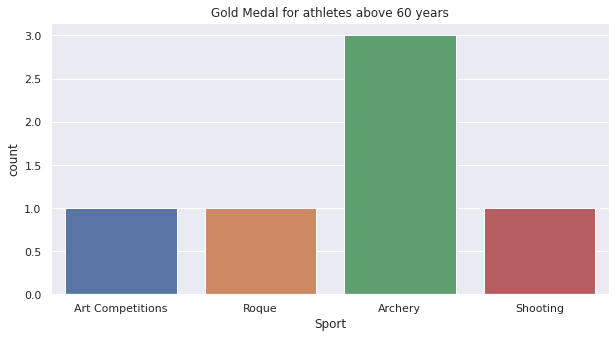

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medal for athletes above 60 years')

# Gold Medal from each country

In [ ]:
country_goldMedals = athletes_df[(athletes_df.Medal=='Gold')].Region.value_counts().reset_index(name='Medal').head()
country_goldMedals

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Gold Medals per Country')

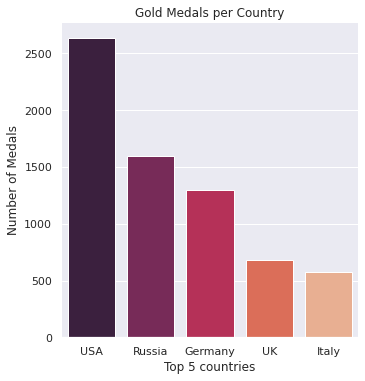

In [ ]:
g = sns.catplot(x='index', y='Medal', data=country_goldMedals,height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 5 countries')
g.set_ylabels('Number of Medals')
plt.title('Gold Medals per Country')

# Rio olympics

In [ ]:
max_year = athletes_df.Year.max()
max_year

team_names = athletes_df[(athletes_df.Year==max_year) & (athletes_df.Medal=='Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise Medals for year 2016')

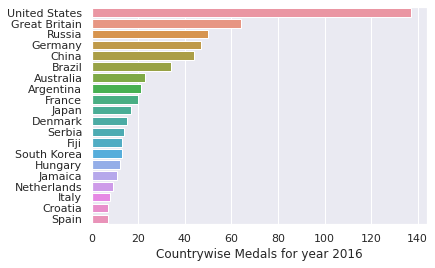

In [ ]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel('Countrywise Medals for year 2016')

In [ ]:
not_null_medals = athletes_df[(athletes_df.Height.notnull()) & (athletes_df.Weight.notnull())]
not_null_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Text(0.5, 1.0, 'Height v/s Weight of Participants')

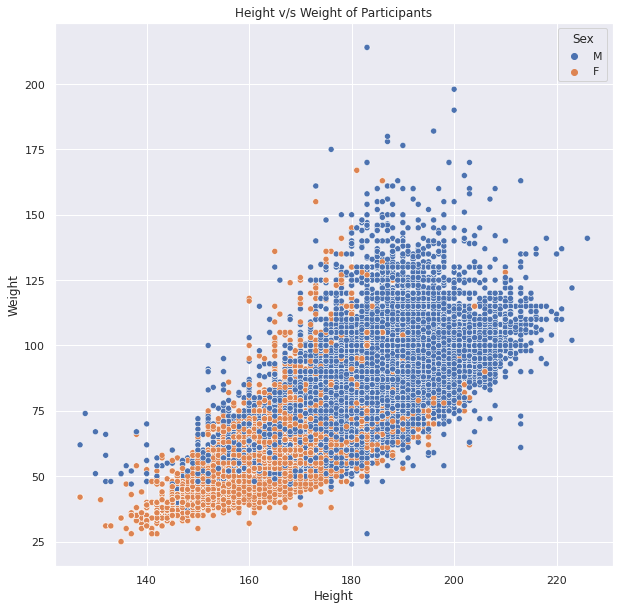

In [ ]:
plt.figure(figsize=(10,10))
axis = sns.scatterplot(x = 'Height', y = 'Weight', data=not_null_medals,hue='Sex')
plt.title('Height v/s Weight of Participants')